# Introducrtion to Machine Learning: Assignment #1
## Submission date: 28\5\2024, 23:59.
### Topics:
- Naïve bayes
- Gaussian Bayes
- Parzen Windows
- KNN

Submitted by:

 Raneem Ibraheem 212920896

 Selan Abu Saleh 212111439

**Assignment Instruction:**

· Submissions in pairs only.

· Try to keep the code as clean, concise, and short as possible

· If you wish to work in your IDE, you can, but you **must**,  insert the script back to the matching cells of the notebook and run the code. <br/>Only the notebook will be submitted in moodle (in `.ipynb` format).

· <font color='red'>Please write your answers to question in red</font>.

**Important:** All plots, results and outputs should be included in the notebook as the cells' outputs (run all cells and do not clear the output). <br/>

**Important:** Your submission must be entirely your own. Any attempts of plagiarism (including ChatGPT) will lead to grade 0 and disciplinary actions.


## Customizing Colab
This is an optional section for you convenience:<br/>
Go to Tools -> Settings -> editor<br/>
There, you can adjust fonts, add line numbers, change indentations.

## Question 1 - Bayesian Classification Assuming Gaussian distribution
You are requested by the Central Bank of America to detect between three types of bankotes: fake, fine, and good. The dataset consists of 5 features which were obtained from the digitized images of banknotes.<br/>
Since the data is continuous, you will implement Gaussian bayes and compare to Gaussian naïve bayes.




import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Load the wine dataset from https://sharon.srworkspace.com/ml/datasets/hw1/banknote_authentication.csv

In [2]:
# Implement here
df = pd.read_csv('https://sharon.srworkspace.com/ml/datasets/hw1/banknote_authentication.csv') #store the provided data in the dataframe
print(df.shape)
df.head(10)

(600, 6)


,contrast,skew,curtosis,heat,cent_col,Class
0,2.446909,2.702995,0.832495,0.531505,-1.734316,0
1,0.870104,2.248493,-1.496408,1.383379,-1.216271,0
2,-1.930227,-2.708964,1.031232,-0.125341,0.683788,2
3,-1.503410,-2.555582,0.838071,-0.691761,1.242841,2
4,-1.027548,-3.375373,0.502047,-1.860655,3.321754,2
5,0.607669,-0.668726,0.653557,-0.539476,1.060485,2
6,0.137887,-1.338049,0.264780,0.714120,1.272975,1
7,1.690845,2.363459,-0.431590,0.657613,-1.132438,0
8,1.462724,2.909887,-0.277218,-0.734254,-1.627782,0
9,-0.118807,-0.998353,0.027847,-0.023366,1.063166,1


Check if there is even potential for gaussian assumption to work here, by plotting the density of the features (without target label!), using plotting for data frames. <br/>
Should gaussian bayes work here? <br/>
<font color='red'>Write here your answer and explain it</font>
<p>Well, as we can see from the graphs down below and fromt he input that we have, that the data is following a gaussian distrepution to some degree, therefore it is safe to assume that we can use the gaussian bayes method in here</p>

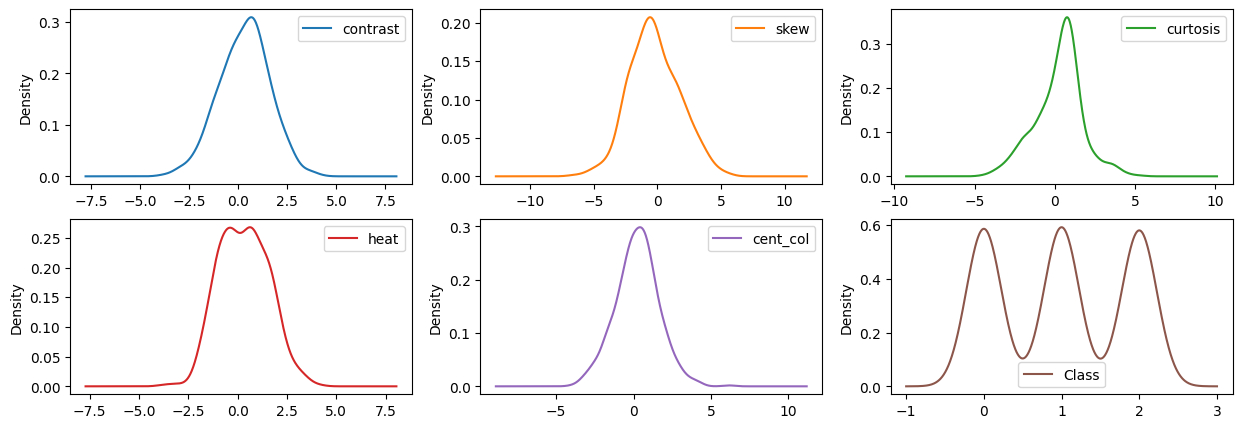

In [3]:
df.plot(kind='density', subplots=True, layout=(2,3), figsize=(15, 5), sharex=False)
plt.show()

Convert the data to numpy and split the data to 80% training and 20% test with random state of 33. Make sure to maintain the dataset balanced, using stratify=y, in train_test_split method.
<br/>Note that the data frame currently includes the labels as well.

In [4]:
# Implement here
df2 = df #we will use this later, bear with me
arr = df.values #we convert the dataset to a numpy array.

X= arr[:,:-1] #we extract the all the rows and columns except for the last one which are the target (the target is the class).
Y= arr[:,-1] #we extract all the values from the last column of the array which will be the target.

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=33, stratify=Y) #now we have features that are in X and Classes that are in Y.
#and we split them into training and testing sets, then we reserve 20% of the data for the testing set and the remaining 80% will be for training.
#the random state will be a parameter that controls the number generator used to shuffle the data before splitting it.
#the stratify balances the dataset by having the same proportion of class labels as the input dataset in the training and testing datasets.

Implement the functions below. <br/>Both get test data $X\in\mathbb{R}^{n\times d}$ and returns the predicted classes (vector sized n), but the naïve bayes assumes that the features are independent.<br/>
Hint for efficient implementation: you don't need more than one loop, use numpy!

In [5]:
#we start by calculating everything we need for the gaussian bayes rule
classes = {}
unique_classes = np.unique(y_train)
for i in unique_classes:
    classes[i] = x_train[y_train == i] #in here we have dictionary that will contain key values corresponding to the values in the x_train, meaning that for each value in x_train we will map it to a specific key

epsilon = 1e-6 #i used this epsilon as you (sharon) suggested in one of the answers to the questions, because the detyermenant of the covariance matrix was negative and there has been a run time error
means = {}
covariance_matrices = {}
variances = {}
prior_probabilities = {}
for i, data in classes.items():
    means[i] = np.mean(data, axis=0) #here we also have a dictionary that will contain the mean for the data
    cov_matrix = np.cov(data, rowvar=False)
    identity_matrix = np.eye(data.shape[1])
    covariance_matrices[i] = cov_matrix + identity_matrix * epsilon #just like before, we calculate the covariance matrices for the data, meaning that for each data point we calculate the covariance matrix
    variances[i] = np.var(data, axis=0) #again with the same process, in here we calculate the variances
    prior_probabilities[i] = len(data) / len(y_train) #same in here, but in this case we calculate the priors
    

def classify_point_gaussian_bayes(test_data, y_train, covariance_matrices, means):
    unique_classes = np.unique(y_train)
    
    inv_cov_matrices = {category: np.linalg.inv(covariance_matrices[category]) for category in unique_classes}
    det_cov_matrices = {category: np.linalg.det(covariance_matrices[category]) for category in unique_classes}
    
    coeffs = {
        category: 1 / ((2 * np.pi) ** (len(means[category]) / 2) * det_cov_matrices[category] ** 0.5)
        for category in unique_classes
    }
    
    likelihoods = np.zeros((len(test_data), len(unique_classes)))
    for i, category in enumerate(unique_classes):
        diff = test_data - means[category]
        exponent = -0.5 * np.sum(diff @ inv_cov_matrices[category] * diff, axis=1)
        likelihoods[:, i] = coeffs[category] * np.exp(exponent) * prior_probabilities[category]
    
    predicted_classes = unique_classes[np.argmax(likelihoods, axis=1)]
    return predicted_classes

def classify_point_gaussian_naive_bayes(test_data, y_train, variances, means, prior_probabilities):

    unique_classes = np.unique(y_train)
    for category in unique_classes:
        variances[category] = np.where(variances[category] == 0, 1e-6, variances[category])
    
    log_likelihoods = np.zeros((len(test_data), len(unique_classes)))
    
    for idx, category in enumerate(unique_classes):
        log_feature_likelihoods = -0.5 * np.sum(
            ((test_data - means[category]) ** 2) / variances[category] + np.log(2 * np.pi * variances[category]),
            axis=1
        )
        log_likelihoods[:, idx] = log_feature_likelihoods + np.log(prior_probabilities[category])
    
    predicted_categories = unique_classes[np.argmax(log_likelihoods, axis=1)]
    
    return np.array(predicted_categories)


For both GB and GNB, we will look at train vs test. Answer the following:
- Which model achieved better learning? Why?
- Could the other model be sometimes better? How, for example?
<br/>
<font color='red'>Write here your answers and explain</font>
<br/>
The results show that the GB classifier performed better than the GNB classifier, because the features were correlated, hence the better performance by the GB classifier.
<br/>
The GNB classifier could perform better in special cases, like the case where all the features are independent.
<br/>Hint: Use the next section, for visualization the correlation matrix on the train.  


In [6]:
# Reminder: success rate is the precentage of correctly classified data within the number of all data in the test set.

dict1 = {'GB': [], 'GNB': []}

accs = classify_point_gaussian_bayes(x_train, y_train, covariance_matrices, means)
dict1['GB'].append(np.count_nonzero(accs == y_train) / len(y_train))

accs = classify_point_gaussian_bayes(x_test, y_train, covariance_matrices, means)
dict1['GB'].append(np.count_nonzero(accs == y_test) / len(y_test))

accs = classify_point_gaussian_naive_bayes(x_train, y_train, variances, means, prior_probabilities)
dict1['GNB'].append(np.count_nonzero(accs == y_train) / len(y_train))

accs = classify_point_gaussian_naive_bayes(x_test, y_train, variances, means, prior_probabilities)
dict1['GNB'].append(np.count_nonzero(accs == y_test) / len(y_test))

df = pd.DataFrame(dict1, columns=['GB', 'GNB'], index=['train', 'test'])
print(df)

             GB       GNB
train  0.952083  0.850000
test   0.941667  0.833333


Its not enough! We want to get even better test results. <br/>
Please look at the train correlation matrix.
- Choose one feature to remove and explain why you chose it.
- If we continue to remove features, what do you expect to happend with the train error?

<font color='red'>Write here your answers and explain them</font>
<br/>
I tested all the features, and they all gave me the same result for the gaussian bayes, as for the naive gaussian bayes, the 2 columns that gave me the highest accuracy upon their removal were the skew and the cent_col, the skew gave me higher accuracy for the training set than the cent_col, whereas the cent_col gave me a higher accuracy for the testing set, hence i chose to remove one of them randomly because i had a trade of, and in the end i chose to remove the cent_col. Also the decision came from the fact that the difference between the accuracy in the testing set was larger than the difference in the training set. As for removing more than one feature, the accuracy drops with each column that we remove.

In [7]:
# Implement here. you may use the code from the tutorial.
# You can obtain the correlation matrix using numpy
X_modified = df2.drop(columns=['cent_col', 'Class']).values #in here we drop the classes column because it is not a part of the data we are using, and we also drop the cent_col to get the highest accuracy
x_train_mod, x_test_mod, y_train_mod, y_test_mod = train_test_split(
    X_modified, Y, test_size=0.2, random_state=33, stratify=Y) #split the data just like we did before, but now we have the modified data

#for the rest of the code in this cell we are doing the same as we did before, but we are using the modified data, since the deminsions are now different, we can't use the 
classes_mod = {}
unique_classes_mod = np.unique(y_train_mod)
for i in unique_classes_mod:
    classes_mod[i] = x_train_mod[y_train_mod == i]

means_mod = {}
covariance_matrices_mod = {}
variances_mod = {}
prior_probabilities_mod = {}
for i, data in classes_mod.items():
    means_mod[i] = np.mean(data, axis=0)
    cov_matrix = np.cov(data, rowvar=False)
    identity_matrix = np.eye(data.shape[1])
    covariance_matrices_mod[i] = cov_matrix + identity_matrix * epsilon
    variances_mod[i] = np.var(data, axis=0)
    prior_probabilities_mod[i] = len(data) / len(y_train_mod)

Adjust the data according to your decision and print again the train and test for both models.

In [8]:
# Change here the train and the test according to the feature you chose to remove

dict1 = {'GB': [], 'GNB': []}

accs = classify_point_gaussian_bayes(x_train_mod, y_train_mod, covariance_matrices_mod, means_mod)
dict1['GB'].append(np.count_nonzero(accs == y_train_mod) / len(y_train_mod))

accs = classify_point_gaussian_bayes(x_test_mod, y_train_mod, covariance_matrices_mod, means_mod)
dict1['GB'].append(np.count_nonzero(accs == y_test_mod) / len(y_test_mod))

accs = classify_point_gaussian_naive_bayes(x_train_mod, y_train_mod, variances_mod, means_mod, prior_probabilities_mod)
dict1['GNB'].append(np.count_nonzero(accs == y_train_mod) / len(y_train_mod))

accs = classify_point_gaussian_naive_bayes(x_test_mod, y_train_mod, variances_mod, means_mod, prior_probabilities_mod)
dict1['GNB'].append(np.count_nonzero(accs == y_test_mod) / len(y_test_mod))

df = pd.DataFrame(dict1, columns=['GB', 'GNB'], index=['train', 'test'])
print(df)

             GB       GNB
train  0.952083  0.845833
test   0.941667  0.866667


Run the boundaries plotting for (scaled) train and test with gaussian bayes.<br/>It will show the decision boundaries as saw in the lectures.

In [9]:
# Essential for the visualization

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

(10353, 5)


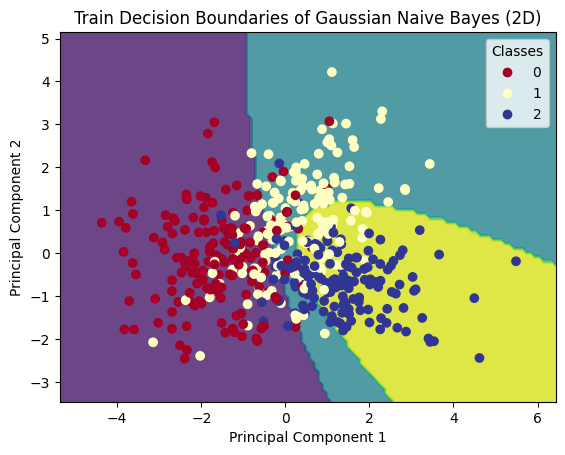

In [10]:
#@title Train Decision Boundaries of Gaussian Naive Bayes (2D)

from sklearn.decomposition import PCA
from tqdm import tqdm

# Reduce the dimensionality of the data to 2 using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(x_train)

# Create a grid of points for visualization in the reduced 2D space
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Use the GNB model to predict class labels for the grid points in the original 13D space
grid_points = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
print(grid_points.shape)
Z = classify_point_gaussian_naive_bayes(grid_points, y_train, variances, means, prior_probabilities)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the data points in the reduced 2D space
plt.contourf(xx, yy, Z, alpha=0.8)
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap=plt.cm.RdYlBu)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title='Classes')

plt.title('Train Decision Boundaries of Gaussian Naive Bayes (2D)')
plt.show()

(7524, 5)




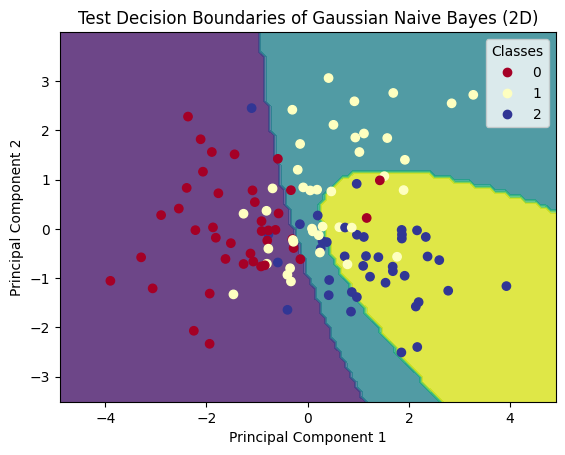

In [11]:
#@title Train Decision Boundaries of Gaussian Naive Bayes (2D)

from sklearn.decomposition import PCA
from tqdm import tqdm

# Reduce the dimensionality of the data to 2 using PCA
X_reduced = pca.transform(x_test)

# Create a grid of points for visualization in the reduced 2D space
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Use the GNB model to predict class labels for the grid points in the original 13D space
grid_points = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
print(grid_points.shape)
print("\n")
Z = classify_point_gaussian_naive_bayes(grid_points, y_train, variances, means, prior_probabilities)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the data points in the reduced 2D space
plt.contourf(xx, yy, Z, alpha=0.8)
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_test, cmap=plt.cm.RdYlBu)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title='Classes')

plt.title('Test Decision Boundaries of Gaussian Naive Bayes (2D)')
plt.show()

## Question 2 - Naive Bayes

In this problem, you’ll implement a basic Naïve Bayes classifier, and use it to predict an emotion by description. <br/>
You will have to classify the sentences into 6 categories, <b>but could be any number.</b><br/>
The categories are {'sadness', 'joy', 'love', 'fear', 'anger', 'ambiguous'}. <br/>

<b>Warning:</b> I haven't personally looked at all the data here. Even though the data is taken from a ML databases site, accept my apologies if there are any offensive sentence.


import libarires

In [12]:
import numpy as np
import pandas as pd
import math
from sklearn.feature_extraction.text import CountVectorizer

Implement the function. It reads all tweets from file and returns the following data structures: <br/>
•	texall - list of documents; each entry corresponds to a tweet which is list of words. <br/>
•	lbAll list of tweets' labels.<br/>
•	voc - set of all distinct words in the file.<br/>
•	cat - set of tweets categories.


In [13]:
def readTrainData(file_name):
  df = pd.read_csv(file_name)
  texAll = [text.split() for text in df['text']]
  lbAll = df['label'].tolist()
  cat=set(df['label'])
  vectorizer = CountVectorizer()
  vectorizer.fit(df['text'])
  voc = vectorizer.get_feature_names_out()

  return texAll, lbAll, voc, cat

Implement the function, which computes and returns the probabilities (on the train set):<br/>
- $P_w$ - a matrix of class-conditional probabilities, $p(x|w_i)$
- $P$ - a vector of class priors, $p(w_i)$

Make sure you deal with the case of word that appears in voc but not in class $w$.

In [14]:
def learn_NB_text():

    category_arr = np.array([lblAll_train.count(category) for category in cat])
    categories_num = len(lblAll_train)
    priors_vector = category_arr / categories_num

    count_vectorizer = CountVectorizer(vocabulary=voc, binary=True)
    vec_matrix = count_vectorizer.fit_transform([' '.join(doc) for doc in texAll_train])
    vec_array = vec_matrix.toarray()

    conditional_prob_matrix = np.zeros((len(cat), len(voc)))
    
    for i, category in enumerate(cat):
        class_indices = np.where(np.array(lblAll_train) == category)[0]
        word_counts = np.sum(vec_array[class_indices, :], axis=0)
        conditional_prob_matrix[i, :] = (word_counts + 1) / (np.sum(word_counts) + len(voc))

    return conditional_prob_matrix, priors_vector

Implement fhe function that classifies all tweets from the test set and computes the success rate.<br/>
Iterate over all tweets of test and for each tweet find the most probable category.
<br/><br/>
Note1: Multiplying lots of probabilities, which are between 0 and 1, can result in floating-point underflow. Since log(xy) = log(x) + log(y), it is better to perform all computations by summing logs of probabilities rather than multiplying probabilities. <br/>Class with highest final un-normalized log probability score is still the most probable.


In [15]:
def ClassifyNB_text(Pw, P):
    
    predicted_categories = []
    voc_list = list(voc)
    cat_list = list(cat) 
    for tweet in texAll_test:
        log_probs = np.log(P) + np.sum([np.log(Pw[:, voc_list.index(word)]) for word in tweet if word in voc_list], axis=0)
        predicted_cat = cat_list[np.argmax(log_probs)]
        predicted_categories.append(predicted_cat)

    correct_predictions = sum(1 for true_category, predicted_cat in zip(lblAll_test, predicted_categories) if true_category == predicted_cat)
    success_rate = correct_predictions / len(texAll_test)

    return success_rate

Read the files

In [16]:
TRAIN_FILE = 'https://sharon.srworkspace.com/ml/datasets/hw1/emotions_train.csv'
TEST_FILE = 'https://sharon.srworkspace.com/ml/datasets/hw1/emotions_test.csv'

texAll_train, lblAll_train, voc, cat = readTrainData(TRAIN_FILE)

# cats must be the same at train and test
# voc of test is irrelevant - we already trained on other voc.
texAll_test, lblAll_test, _, __ = readTrainData(TEST_FILE)

Train the model, classify it on the test and report the success rate

In [17]:
Pw, P = learn_NB_text()
sum_right = ClassifyNB_text(Pw, P)
print(sum_right)

0.7625


## Question 3 - KNN
You want to detect stars into 6 types of stars by measuring their properties. <br/> NASA gave you their dataset, including temperature, color, Spectral_Class and more. <br/> In addition, you aim to compare different distance metric to determine which one is the best for this data.

import libaries

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

Load the data, print the first three rows<br/>
https://sharon.srworkspace.com/ml/datasets/hw1/Stars.csv

In [19]:
# Implement here
df = pd.read_csv('https://sharon.srworkspace.com/ml/datasets/hw1/Stars.csv')
df.head(3)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.0024,0.1700,16.12,Red,M,0
1,3042,0.0005,0.1542,16.60,Red,M,0
2,2600,0.0003,0.1020,18.70,Red,M,0


Convert categorial features to discerete values

In [20]:
colors = df['Color'].unique()
for idx, color in enumerate(colors):
  df['Color'] = df['Color'].replace({color: idx})

spec_class = df['Spectral_Class'].unique()
for idx, spec in enumerate(spec_class):
  df['Spectral_Class'] = df['Spectral_Class'].replace({spec: idx})
df.head(3)

C:\Users\Alpha\AppData\Local\Temp\ipykernel_9680\3654998465.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Color'] = df['Color'].replace({color: idx})
C:\Users\Alpha\AppData\Local\Temp\ipykernel_9680\3654998465.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Spectral_Class'] = df['Spectral_Class'].replace({spec: idx})


,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.0024,0.1700,16.12,0,0,0
1,3042,0.0005,0.1542,16.60,0,0,0
2,2600,0.0003,0.1020,18.70,0,0,0


Check the correlation matrix between the features. <br/>
Which distance metric do you expect to work better: Euclidean distance, of the Mahalanobis distance? <br/>
<font color='red'>Write here your answer and explain it</font>
<br/>
as we can see in the correlation matrix, there is a significant correlation among several variables, and as we learned in the past, the Mahalanobis distance takes the correlation into consideration, whereas the Euclidean distance doesn't, therefore the Mahlanobs should work better in our case.

In [21]:
# Implement here
features = df.drop(columns=['Type']).values
cov_matrix = np.cov(features, rowvar=False)
std_devs = np.sqrt(np.diag(cov_matrix))
correlation_matrix = cov_matrix / np.outer(std_devs, std_devs)

print(correlation_matrix)

[[ 1.          0.39340408  0.06421597 -0.42026054  0.53593417  0.52740414]
 [ 0.39340408  1.          0.52651572 -0.69261923  0.19924876  0.40947338]
 [ 0.06421597  0.52651572  1.         -0.60872823 -0.06250917  0.0014671 ]
 [-0.42026054 -0.69261923 -0.60872823  1.         -0.35227141 -0.43367314]
 [ 0.53593417  0.19924876 -0.06250917 -0.35227141  1.          0.70151577]
 [ 0.52740414  0.40947338  0.0014671  -0.43367314  0.70151577  1.        ]]


Split the data to 90% train and 10% test, with random state 42. <br/>
Afterwards, split the train into 80% train and 20% validation, also with random state of 42<br/>
Make sure to maintain the dataset balanced, using stratify=y, in train_test_split method. <br/> You can check the balance using df.value_counts().

In [22]:
# Implement here
X = df.drop('Type', axis=1)
Y = np.array(df['Type'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42,stratify=Y)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, test_size=0.2, random_state=42,stratify=y_train)

X_train = np.array(X_train)
X_test = np.array(X_test)

X_train2 = np.array(X_train2)
X_test2 = np.array(X_test2)
df.value_counts()

Temperature  L              R          A_M      Color  Spectral_Class  Type
1939         0.000138       0.1030      20.060  0      0               0       1
2600         0.000300       0.1020      18.700  0      0               0       1
10930        783930.000000  25.0000    -6.224   6      4               4       1
10980        0.000740       0.0087      11.190  1      1               2       1
11000        170000.000000  1779.0000  -9.900   7      1               5       1
                                                                              ..
3553         145000.000000  1324.0000  -11.030  0      0               5       1
3570         320000.000000  1480.0000  -7.580   0      0               5       1
3574         200000.000000  89.0000    -5.240   0      0               4       1
3575         123000.000000  45.0000    -6.780   0      0               4       1
40000        813000.000000  14.0000    -6.230   6      4               4       1
Name: count, Length: 240, dtype: 

Implement the function 'Euclidian'. <br/>
This function gets train and test datasets ($m\times d, n\times d$) and returns the distance metric sized $m \times n$, based on euclidian distance metric


In [23]:
def Euclidean(test, data):
  distances = np.zeros((len(test),len(data)))
  for i in range(len(test)):
    for j in range(len(data)):
      distances[i, j] = np.sqrt(np.sum((test[i] - data[j]) ** 2))
  return distances

def Mahalanobis(test, data):
  distances = np.zeros((test.shape[0], data.shape[0]))
  covariance_matrix_data = np.cov(data, rowvar=False)

  # Calculate the Mahalanobis distances
  for i in range(test.shape[0]):
      for j in range(data.shape[0]):
          diff =  test[i] - data[j]
          distances[i, j] = np.sqrt(np.dot(np.dot(diff, np.linalg.inv(covariance_matrix_data)), diff.T))
  return distances

Implement the function kNN_classify that returns array sized m, which are the predictions for the m test samples.

In [24]:
def kNN_classify(data, labels, test, k, metric='Euclidian', p=2):
  if metric == 'Minkowski':
      distances = Minkowski(test, data, p)
  elif metric == 'Euclidean':
      distances = Euclidean(test, data)
  else:
      distances = Mahalanobis(test, data)
  # Implement here
  predictions = []
  for i in range(distances.shape[0]):
      k_nearest_indices = distances[i].argsort()[:k]
      k_nearest_labels = labels[k_nearest_indices]
      unique, counts = np.unique(k_nearest_labels, return_counts=True)
      most_common_label = unique[counts.argmax()]
      predictions.append(most_common_label)

  return np.array(predictions)

Look at the plots for different k values. Note that the Mahalanobis distance metric is already implemented to you above. <br/>Run the following code and compare the performance of Mahalanobis vs Euclidian, specifically as function of k. <br/>
<font color='red'>Write here your answer and explain it</font>
<br />
as shown in the graphs, the mahalanobis distance performs better all the way since it gave a better accuracy for every k.

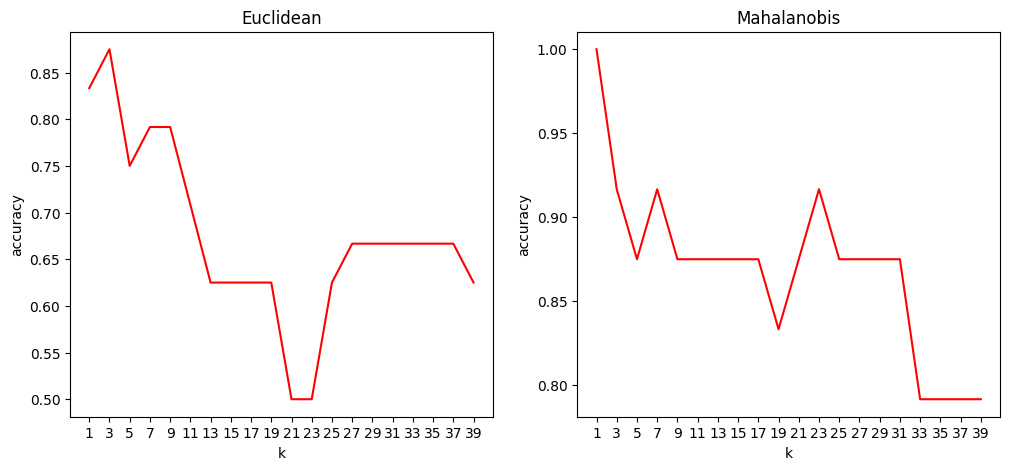

In [25]:
metrics = ['Euclidean', 'Mahalanobis']
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for idx, metric in enumerate(metrics):

  ks = np.arange(1, 41, 2)
  accs = []
  for k in ks:
    c = kNN_classify(X_train, y_train, X_test, k, metric)
    accs.append(np.mean(c == y_test))   # Implement here

  axs[idx % 2].plot(ks, accs, color='red')
  axs[idx % 2].set_xlabel('k')
  axs[idx % 2].set_ylabel('accuracy')
  axs[idx % 2].set_title(metric)
  axs[idx % 2].set_xticks(ks)
plt.show()

Now, we implement the $L_p$ norm distance metric. Reminder:
$$ d(x,y)=||x-y||_p=\left(\sum_{i=1}^d |x_i-y_i|^p\right)^{\frac{1}{p}} $$
Remark: $L_1$ is the Manhattan distance and $L_2$ is the Euclidian.

In [26]:
def Minkowski(test, data, p):
  distances = np.zeros((len(test), len(data)))
  for i in range(len(test)):
      for j in range(len(data)):
          distances[i, j] = np.sum(np.abs(test[i] - data[j]) ** p) ** (1 / p)
  return distances

Find the hyperparameter p that fits best to this problem (between 1-10)

In [27]:
# Implement here
p_values = np.arange(1, 11)
p_accuracies = []

for p in p_values:
    ks = np.arange(1, 41, 2)
    best_acc = 0
    for k in ks:
        c = kNN_classify(X_train, y_train, X_test, k, metric='Minkowski', p=p)
        acc = accuracy_score(y_test, c)
        if acc > best_acc:
            best_acc = acc

    p_accuracies.append(best_acc)

best_p = p_values[np.argmax(p_accuracies)]
print(f"The best value of p is {best_p} with an accuracy of {max(p_accuracies)}")

The best value of p is 1 with an accuracy of 0.875


For that p, print the accuracy on the test as function of k. Is it really better  than the first two matrices? <br/>
<font color='red'>Write here your answer and explain it</font>

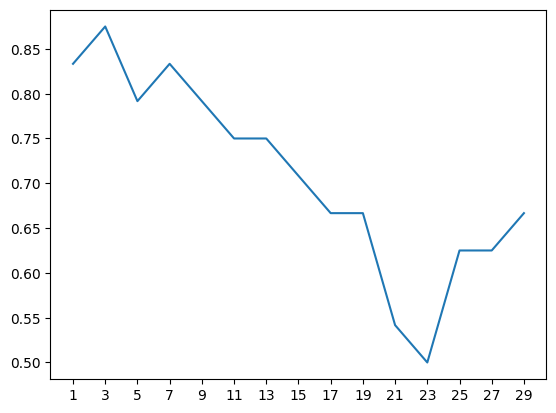

In [28]:
ks = np.arange(1, 30, 2)
accs = []
best_p = 1       # You may change the usage of p according to your previous implementation

for k in ks:
    c = kNN_classify(X_train, y_train, X_test, k, 'Minkowski', p=best_p)
    accs.append(np.mean(c == y_test))   # Implement here

plt.plot(ks, accs)
plt.xticks(ks)
plt.show()

### Thats it!
If you choose to continue, 5 pts bonus!

We are going to classify the fashion MNIST data.<br/>
First, load the the train and test from:
- https://sharon.srworkspace.com/ml/datasets/hw1/fashion-mnist_train.csv
- https://sharon.srworkspace.com/ml/datasets/hw1/fashion-mnist_test.csv

Seconly, convert it to numpy and obtain the train and test data & labels

In [29]:
# Implement here

dispaly some random image

In [30]:
idx = np.random.randint(len(X_train))
plt.imshow(X_train[idx].reshape(28,28), cmap='gray')
plt.show()

ValueError: cannot reshape array of size 6 into shape (28,28)

Use some google to search for appropriate distance metric that should classify correctly images. From what you read, explain yourselves, why is it a good distance metric?<br/>
<font color='red'>Write here your answer and explain it</font>

Now, use the sklearn package of KNN with the metric you chose and print a graph of accuracy on the test, as function of k.<br/>
Were you correct?

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Implement here

## Question 4 - Parzen Windoes
See attached PDF in Moodle